# Project: Tinatic- Machine Learning from Disaster

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
train_df = pd.read_csv("./data/train.csv", index_col= "PassengerId")
test_df = pd.read_csv("./data/test.csv", index_col= "PassengerId")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [237]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Note
* SibSp : anh, chị e 
* Parch : bố mẹ, trẻ em trên board
* Ticket : tk number
* Cabin : Cabin number

In [238]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical and Numerical
( phân loại đặc trưng : Số  và 

In [239]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [240]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Type of data
* Categorical: Survived, Embarked, Sex, Pclass, SiSp, Parch
* Numerical: Age, Fare
* Mix of data: Ticket, Cabin
* Contain Errol: Name
* Blank or Null:Cabin, Age, Embarked
* Various Data Type: String , Int, Float

### Convert dtype

In [241]:
train_df["Survived"] = train_df["Survived"].astype('category')

In [242]:
converted_feature  = ['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
def convert_cat(df, converted_feature):
    for converted_feature in converted_feature:
        df[converted_feature] = df[converted_feature].astype('category')
convert_cat(train_df,converted_feature )
convert_cat(test_df, converted_feature)

In [243]:
test_df.info(), train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 

(None, None)

### Distrubution of Numerical feature values across the sample
( Mật độ phân bố đặc trưng )

In [244]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical

In [245]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Exploratary Data Analyst (EDA)

### Target Variable : Survived

In [246]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [247]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


* Số người sống có 38,38 %

### Sex

In [248]:
train_df["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [249]:
train_df["Sex"].value_counts(normalize= True).to_frame()

,Sex
male,0.647587
female,0.352413


* Nam giới chiếm 64,7%
* Nữ giới chiếm 35,24%

## Vizualine

<AxesSubplot:xlabel='Sex', ylabel='count'>

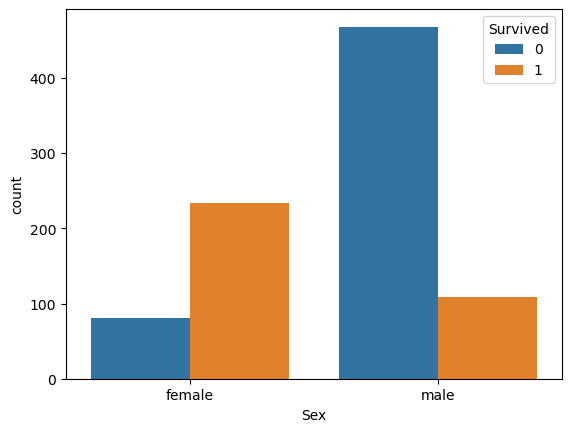

In [250]:
sns.countplot(data = train_df,hue="Survived", x = 'Sex')

IndexError: index 2 is out of bounds for axis 1 with size 2

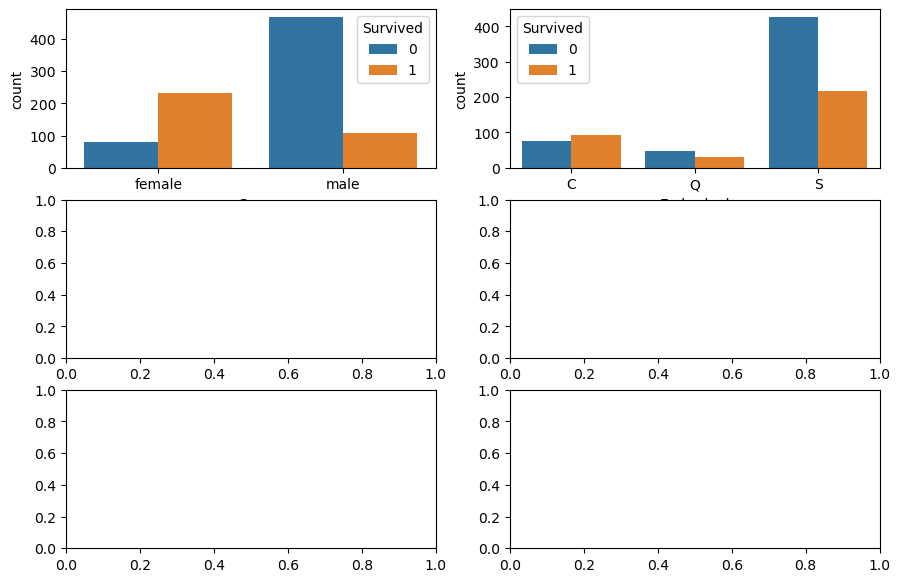

In [251]:
cols = [ "Sex", "Embarked", "Pclass", "SibSp", "Parch"]
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_cols,n_rows,  figsize = (n_cols*3.5,n_rows* 3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_rows + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue = "Survived", ax = ax_i)
        

## EDA for Numerical Feature
* Age, Fare

### Age

In [ ]:
sns.histplot(data = train_df, x = "Age", bins = 40, kde = True, hue = "Survived");

### Fare

In [ ]:
train_df["Fare"].describe()

In [ ]:
sns.histplot(data = train_df, x = "Fare", bins = 50, hue = "Survived")

In [252]:
## To name for 0-25%, 25-50, 50-75, 75-100 %
fare_categorical = ["Economic", "Normal", "Expensive", " Luxury"]
quartile_data = pd.qcut(x = train_df["Fare"], q = 4, labels = fare_categorical)

<AxesSubplot:xlabel='Fare', ylabel='count'>

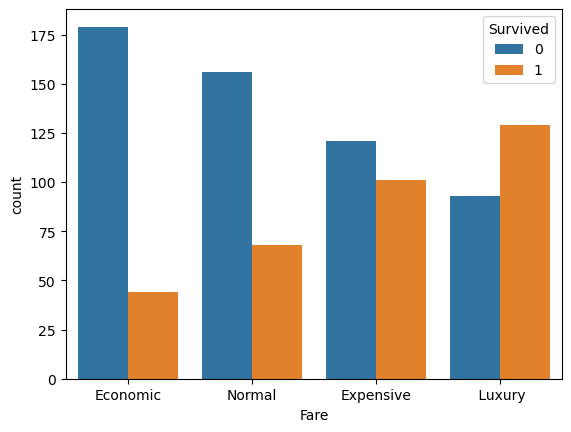

In [253]:
sns.countplot(x = quartile_data, hue = train_df["Survived"])

## Feature Engineering , Data Wrangling

### Name

In [254]:
train_df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [255]:
import re
def express_title(name):
    p = re.compile(r",([\w\s]+)\.") 
    return p.search(name).groups(1)[0].strip()
train_df["Title"] = train_df['Name'].apply(lambda name: express_title(name))

In [256]:
train_df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [257]:
test_df["Title"] = test_df["Name"].apply(lambda name: express_title(name))

In [258]:
test_df["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

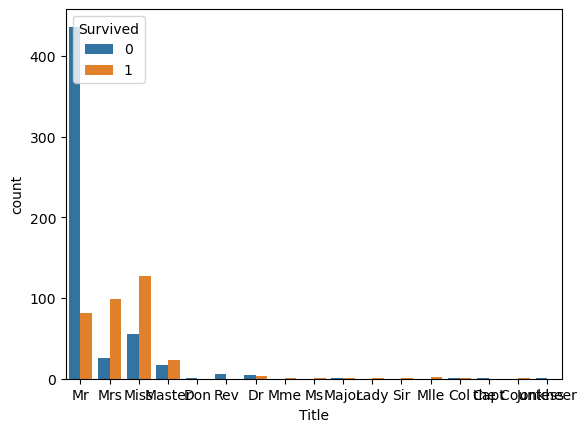

In [259]:

sns.countplot(data = train_df, x= "Title" , hue = "Survived" )

In [260]:
def group_title(title):
    if title in ["Mr", "Mrs", "Miss", "Master"]:
        return title
    elif title == "Ms":
        return  "Miss"
    else:
        return "Orther"
train_df["Title"] = train_df["Title"].apply( lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply( lambda title: group_title(title))

In [261]:
train_df["Title"].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Orther     26
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

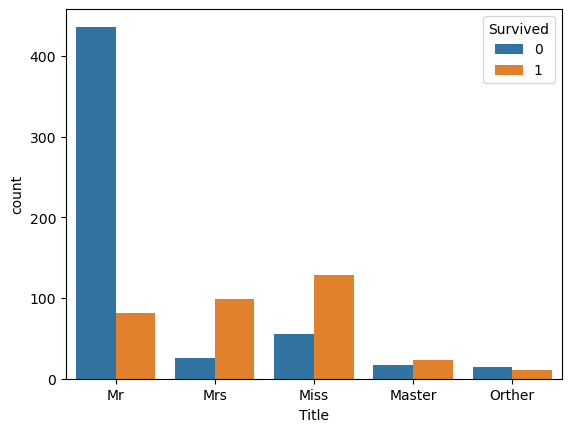

In [262]:
sns.countplot(data = train_df, x = "Title", hue = "Survived")

## Family
* 'SibSp', 'Parch'

In [263]:
train_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

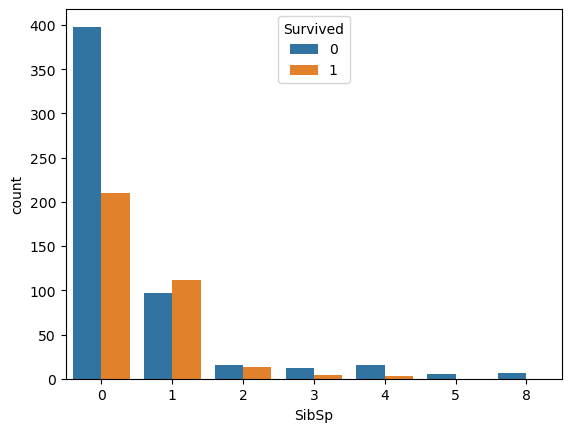

In [264]:
sns.countplot(data = train_df, x = "SibSp", hue = "Survived")

In [265]:
train_df["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

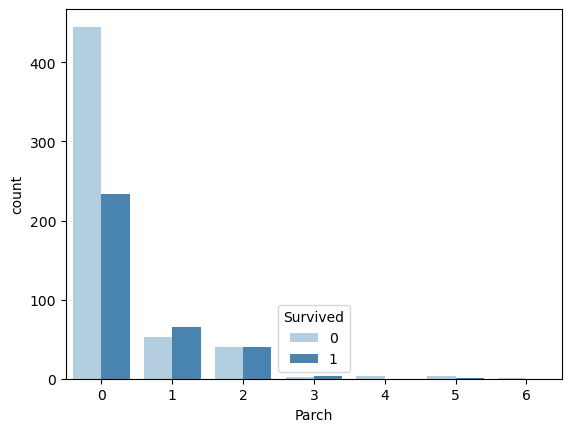

In [266]:
sns.countplot(data = train_df, x = "Parch", hue = "Survived", palette="Blues");

In [267]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") + 1
test_df["Family_size"] = test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") + 1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

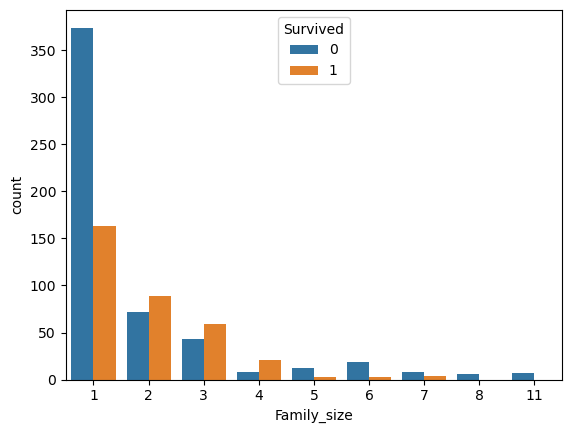

In [268]:
sns.countplot(data = train_df, x = "Family_size", hue = "Survived" )

In [269]:
train_df["Family_Cat"] = pd.cut(x =train_df["Family_size"], bins=(0,1,4,6,20), labels= ['Solo', 'Small', 'Median', 'Large'])
test_df["Family_Cat"] = pd.cut(x =test_df["Family_size"], bins=(0,1,4,6,20), labels= ['Solo', 'Small', 'Median', 'Large'])

<AxesSubplot:xlabel='Family_Cat', ylabel='count'>

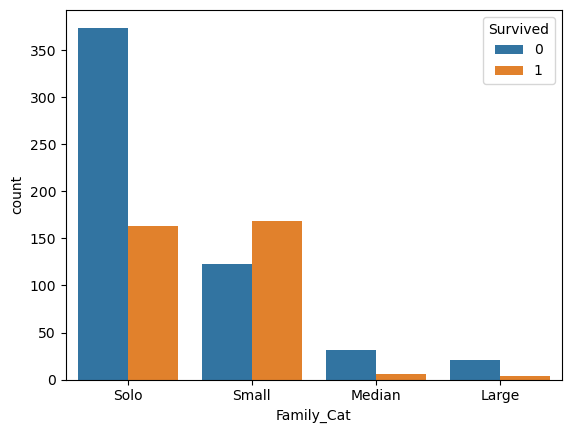

In [319]:
sns.countplot(data = train_df, x = train_df["Family_Cat"], hue = "Survived")

# Data Wrangling

In [300]:
num_feature = ["Age", "Fare"]
cate_feature = ["Sex", "Pclass", "Embarked", "Title", "Family_Cat"]

col_feature = num_feature + cate_feature 
print(col_feature)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [301]:
def missing_values(df, col_feature):
    for col in col_feature:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count} missing values")
missing_values(train_df, col_feature)
missing_values(test_df, col_feature)

Embarked has 2 missing values
Fare has 1 missing values


### Filling Missing Values

* Filling missing values with Median of whole dateset

In [302]:
age_sex_pclass = train_df.groupby(["Sex", "Pclass"]).median(["Age"])
age_sex_pclass["Age"]

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [303]:
train_df["Age"]= train_df.groupby(["Sex", "Pclass"])["Age"].apply(lambda x : x.fillna(x.median()))
train_df["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [304]:
test_df["Age"] = test_df.groupby(["Sex", "Pclass"])["Age"].apply(lambda x : x.fillna(x.median()))
test_df["Age"]

PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305    24.0
1306    39.0
1307    38.5
1308    24.0
1309    24.0
Name: Age, Length: 418, dtype: float64

In [305]:
## Check nhung value NAN da dc Fill
missing_values(train_df, col_feature)

Embarked has 2 missing values


In [306]:
X = train_df[col_feature]
Y = train_df["Survived"]

In [307]:
X_test = test_df[col_feature]

In [308]:
## Preprocessing Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn. compose import ColumnTransformer
num_tranformer = Pipeline(steps=  [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

cat_tranformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore" ))
])

In [309]:
preprocesser = ColumnTransformer(transformers=[
    ("num", num_tranformer, num_feature),
    ("cat", cat_tranformer, cate_feature)
])

In [310]:
preprocesser.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [311]:
X = preprocesser.transform(X)  ## X -> X_train, X_values

In [312]:
X_test =preprocesser.transform(X_test)

# 5 Data Modeling

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2)

In [315]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [316]:
X_test.shape

(418, 19)

In [333]:
# Binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, classification_report, confusion_matrix
log_reg = LogisticRegression(solver = "liblinear", max_iter= 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [328]:
log_reg.score(X_val, y_val)

0.8156424581005587

In [329]:
y_pre = log_reg.predict(X_val)

In [332]:
precision_score(y_val, y_pre), recall_score(y_val,y_pre)

(0.782608695652174, 0.75)

In [334]:
print(classification_report(y_val, y_pre))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.78      0.75      0.77        72

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

